This notebook contains a couple of small solutions to questions which were brought up by users.

In [1]:
# a little bit of initialization, for the display of structure images
from IPython.display import SVG

# Problem 1:

What is the R/S stereochemistry of the compound with CID 350086 in PubChem?

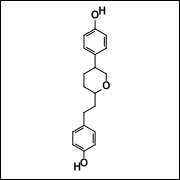

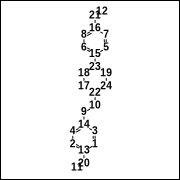

In [2]:
# The toolkit supports creation of structure (ensemble) objects directly from various identifiers,
# including lookup via the chemical identifier resolver
e=Ens('NSC350086')
display(SVG(e.E_SVG_IMAGE))
display(SVG(e.get('E_SVG_IMAGE',parameters={'asymbol':'label'})))

Obviously, this compound contains two potential stereocenters. On the other hand, the bonds on these do not use wedges. This means, the stereochemistry on these centers is undefined. We can check that:

In [3]:
# the labels of the atoms which are stereogenic 
print(e.atoms(filters='astereogenic'))
# just for confirmation, the result of the steregenicity property
print(e.get('A_STEREOGENIC',filters='astereogenic'))
# the CIP atomic stereo descriptors - undefined because of explicit undefinedness
# the toolkit can compute stereo descriptors from various sources - bond display flags,
# atomic 3D coordinates, other stereo descriptors. But it refrains from it when it
# finds data which excplicitly indicates the absence of stereochemistry, such as wavy single
# bonds or crossed double bonds.
print(e.get('A_CIP_STEREO',filters='astereogenic'))


[22, 23]
['yes', 'yes']
['undef', 'undef']


# Problem 2

An attendee at an online confererence on reaction information complained that it was not possible with a single SMIRKS transform to create alternative reagent molecules (using different halogen substituents) in a popular cheminformatics toolkit. This is not really a bug - SMIRKS transforms cannot contain query expressions on the right side, at least not in an implementation which only implements the basic standard.

In Cactvs, this is however possible with minimum effort. It is possible to attach reagent atoms on the right side which are not simple atoms and then to expand these.

(ens3,)


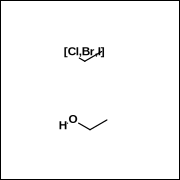

In [4]:
# ethyl ether
e=Ens('CCOCC')
# straightforward SMIRKS transform
rg=e.transform('[C:1][O:2][C:3]>>[C:1][O:2][#1].[Cl,Br,I][C:3]',direction='forward',reactionmode='singlestep')
print(rg)
# the result is a reagent tuple, regardless how many result structures are produced, so we use index zero even if there is only 
# a single reagent
display(SVG(rg[0].E_SVG_IMAGE))

The result contains an atom list. We can expand this specification into a set of normal structures.
There is a predefined property for this. The result is a dataset of all distinct possible
expansions.

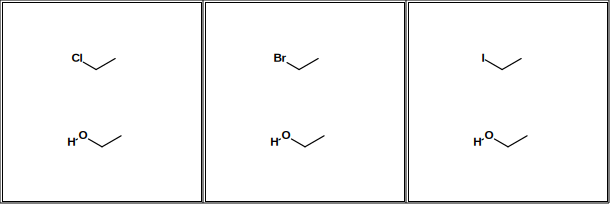

In [5]:

display(SVG(rg[0].E_EXPANDED_QUERY_STRUCTURES.get('D_SVG_IMAGE',parameters={"nrows":1})))

This type of expansion also works with first-level Recursive SMARTS structures:

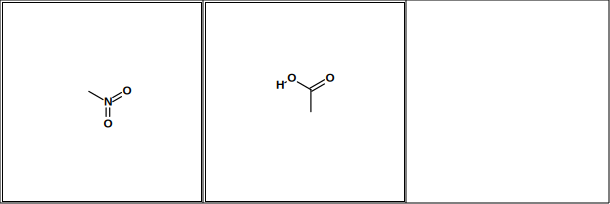

In [11]:
e=Ens('C[$(N(=O)=O),$(C(=O)O)]','smarts')
display(SVG(e.E_EXPANDED_QUERY_STRUCTURES.get('D_SVG_IMAGE',parameters={"nrows":1})))

And of course with any combination of these:

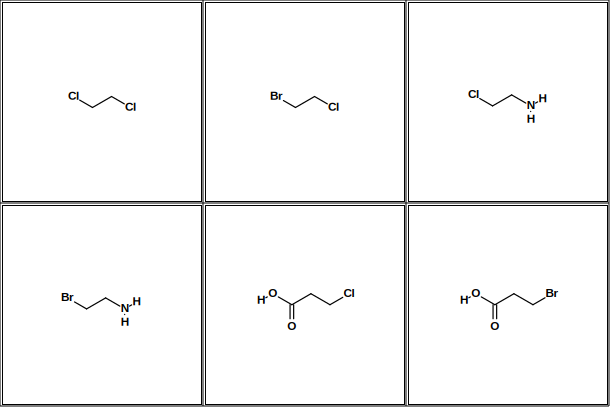

In [12]:
e=Ens('[Cl,Br]CC[Cl,N,$(C(=O)O)]')
display(SVG(e.E_EXPANDED_QUERY_STRUCTURES.get('D_SVG_IMAGE',parameters={"nrows":2})))